# Are Relations Relevant in CNNs? *A Study Based on a Facial Dataset*

## Testing Baseline FCN *(30 Epochs - 13 Layers)*

### Imports, Seed, GPU integration

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
# Seeds for better reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Data preparation

In [5]:
test_path = '../../../picasso_dataset/FFA-data/middle/test'

In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['no_face', 'face'], batch_size=10, shuffle=False)

Found 3000 images belonging to 2 classes.


In [7]:
assert test_batches.n == 3000
assert test_batches.num_classes == 2

### Loading the trained FCN

In [8]:
filename='../models/FCN-B-30E-14L-02.h5'
loaded_model = load_model(filename)

### Accuracy and loss of the trained model

In [9]:
scores = loaded_model.evaluate(test_batches, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.2f%%" % (scores[0]*100))

300/300 - 7s - loss: 0.4056 - accuracy: 0.8780
Accuracy: 87.80%
Loss: 40.56%


### Testing the FCN

In [10]:
predictions = loaded_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

### Index of wrongly predicted pictures

In [11]:
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)

In [12]:
face_but_predicted_no_face=[]
no_face_but_predicted_face=[]

for i in range(len(predictions)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 1:
                face_but_predicted_no_face.append(i+8001-1500) #Index of file on disk
            else:
                no_face_but_predicted_face.append(i+8001) #Index of file on disk

print("Data from class 'face', that was wrongly predicted as 'no-face' [", len(face_but_predicted_no_face), "] :")
print(face_but_predicted_no_face)
print("----------------------------------------------------------------------------------------------")
print("Data from class 'no-face', that was wrongly predicted as 'face' [", len(no_face_but_predicted_face), "] :")
print(no_face_but_predicted_face)

Data from class 'face', that was wrongly predicted as 'no-face' [ 276 ] :
[8004, 8007, 8008, 8009, 8011, 8015, 8023, 8025, 8030, 8040, 8053, 8056, 8060, 8069, 8077, 8082, 8094, 8096, 8106, 8113, 8115, 8128, 8144, 8151, 8154, 8157, 8162, 8169, 8171, 8172, 8174, 8175, 8182, 8189, 8197, 8202, 8208, 8209, 8215, 8225, 8227, 8233, 8237, 8244, 8246, 8248, 8272, 8274, 8291, 8301, 8307, 8312, 8314, 8321, 8322, 8323, 8325, 8327, 8338, 8339, 8341, 8345, 8347, 8351, 8354, 8365, 8368, 8373, 8378, 8379, 8380, 8397, 8399, 8402, 8407, 8419, 8427, 8431, 8435, 8439, 8442, 8448, 8451, 8452, 8457, 8464, 8468, 8478, 8484, 8491, 8497, 8502, 8503, 8513, 8520, 8522, 8533, 8535, 8536, 8541, 8545, 8551, 8558, 8560, 8561, 8563, 8571, 8572, 8575, 8578, 8580, 8583, 8588, 8594, 8598, 8602, 8608, 8619, 8622, 8623, 8633, 8644, 8645, 8654, 8655, 8674, 8694, 8695, 8696, 8700, 8705, 8707, 8715, 8722, 8744, 8746, 8747, 8748, 8751, 8752, 8759, 8766, 8772, 8781, 8783, 8793, 8800, 8804, 8808, 8816, 8827, 8842, 8845, 8846, 8

### Confusion matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
test_batches.class_indices

{'no_face': 0, 'face': 1}

Confusion matrix, without normalization
[[1410   90]
 [ 276 1224]]


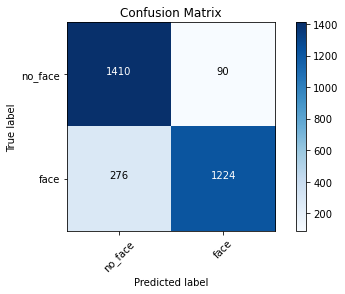

In [15]:
cm_plot_labels = ['no_face','face']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
